<a href="https://colab.research.google.com/github/leodavidfan/AI_Books/blob/main/HW6_Fan_Li.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 6: Discrete Probability Distributions in Machine Learning**

**Q1. Expected Value and Variance (10 points)
A data scientist is analyzing user behavior on a website. Each user’s session can be modeled
as follows:
• 60% chance of viewing only one page
• 30% chance of viewing two pages
• 10% chance of viewing three pages
(a) Define the random variable and its probability mass function
(b) Calculate the expected number of pages viewed per session
(c) Calculate the variance in the number of pages viewed
(d) Explain what these metrics tell us about user behavior**

**(a) Define the random variable and its probability mass function**

In [13]:
P_X1 = 0.60
P_X2 = 0.30
P_X3 = 0.10

**(b) Calculate the expected number of pages viewed per session**

In [14]:
E_X = 1*P_X1 + 2*P_X2 + 3*P_X3
print('mean: ', E_X)

mean:  1.5


**(c) Calculate the variance in the number of pages viewed**

In [15]:
E_X2 = 1**2*P_X1 + 2**2*P_X2 + 3**2*P_X3
VAR_X = E_X2 - E_X**2
print("variance:", VAR_X)

variance: 0.44999999999999973


**(d) Explain what these metrics tell us about user behavior**

**• The average user views 1.5 pages per session, indicating most users do not explore deeply into the website.**

Correct
Reason:
1. According to data from Littledata, the average "user view per session" (also known as "pages per session") is around 2.6 pages per session


**• The relatively small variance (0.45) suggests that user behavior is fairly consistent.**

Correct.
Reason:
1. 0.45 is relatively small value for variance


**• The distribution is right-skewed, with a small percentage of users viewing more pages.**

Correct.
Reason:
1. Right-skewed Distribution: When the distribution has a long tail towards the right side, then it is known as a right-skewed or positive-skewed distribution.
2. P(X=1)=0.6 > P(X=2)=0.3 > P(X=3)=0.1, long tail



**Q2. Bernoulli Distribution in A/B Testing (25 points)
You’re running an A/B test for a new website design. The current design has a conversion
rate of 12%.
(a) Model this as a Bernoulli distribution and write its PMF (5 points)
(b) If you observe 1000 visitors, what’s the expected number of conversions? (5 points)
(c) What’s the variance in the number of conversions? (5 points)
(d) Write a Python function that simulates this experiment 1000 times and plots the
distribution of results (10 points)**

**(a) Model this as a Bernoulli distribution and write its PMF (5 points)**
Wrong. This is not Bernoulli distribution, but a Binominal distribution, which represents p is the discrete successful rate in a sequence of n independent experiments, while bernoulli is the individual experiment with p is the discrete successful rate for yes and no decisions.


**(b) If you observe 1000 visitors, what’s the expected number of conversions? (5 points)**
The expected number of conversion is the expected value. From simulation, Mean conversions: 119.19. From hand calculation, Mean conversions: n*p = 1,000 * 12% = 120. The discrepancy is introduced by computation.


**(c) What’s the variance in the number of conversions? (5 points)**
From hand calculation, the variance is n*p(1-p)=1,000*12%*(1-12%) = 1000*0.12*(1-0.12) = 105.6. From simulation, the variance is Variance conversions: 104.69, which is the square of std. The discrepancy is introduced by computation.


**(d) Write a Python function that simulates this experiment 1000 times and plots the distribution of results (10 points)**
Shown in the histgram plot.



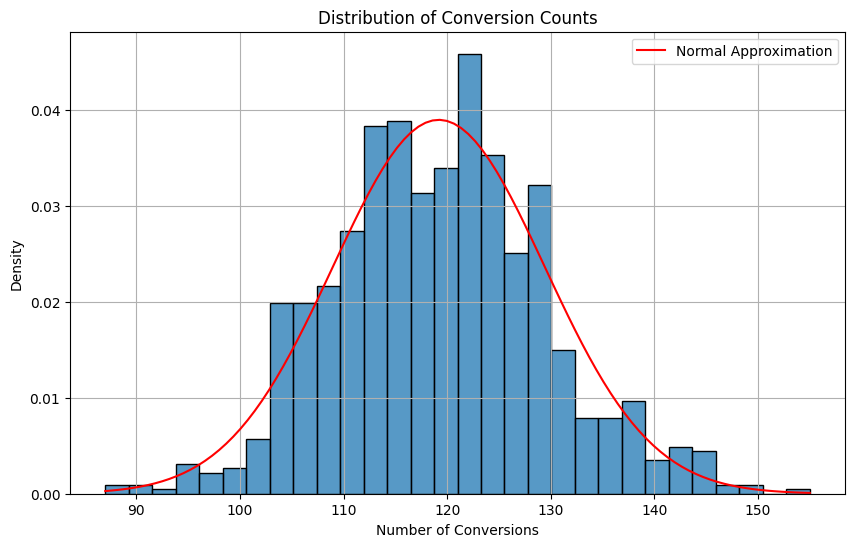

Mean conversions: 119.19
Standard deviation: 10.23
Variance conversions: 104.69


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

def simulate_ab_test(n_visitors=1000, conv_rate=0.12, n_simulations=1000):
  # Set the seed value
  np.random.seed(42)

  # Run simulations
  results = np.random.binomial(n=n_visitors, p=conv_rate, size=n_simulations)

  # Plot distribution
  plt.figure(figsize=(10, 6))

  sns.histplot(results, stat='density', bins=30)
  # Add normal approximation curve
  x = np.linspace(results.min(), results.max(), 100)
  y = np.exp(-(x - np.mean(results))**2 / (2 * np.var(results))) \
    / np.sqrt(2 * np.pi * np.var(results))
  plt.plot(x, y, 'r-', label='Normal Approximation')

  plt.title('Distribution of Conversion Counts')
  plt.xlabel('Number of Conversions')
  plt.ylabel('Density')
  plt.legend()
  plt.grid(True)
  plt.show()

  return results

# Run simulation
results = simulate_ab_test()
print(f"Mean conversions: {np.mean(results):.2f}")
print(f"Standard deviation: {np.std(results):.2f}")

# added calculcation
print(f"Variance conversions: {np.std(results)**2:.2f}")

**Q3. Binomial Distribution Application (25 points)
A machine learning model correctly classifies emails as spam with 95% accuracy. You test
it on a batch of 200 emails.
(a) What distribution would you use to model the number of correct classifications? Justify
your answer. (5 points)
(b) Calculate the probability of getting exactly 190 correct classifications (5 points)
(c) What’s the probability of getting 185 or more correct classifications? (10 points)
(d) If you needed to guarantee 90% accuracy with 95% confidence, how many emails would
you need to test? (5 points)**

**(a) What distribution would you use to model the number of correct classifications? Justify your answer. (5 points)**

Correct.
Reason:

The number of correct classifications follows a Binomial distribution:

• Each email classification is a Bernoulli trial (success/failure)

• There is a fixed number of trials (n = 200)

• Trials are independent

• The probability of success (p = 0:95) is constant

**(b) Calculate the probability of getting exactly 190 correct classifications (5 points)**

From hand calculation, using the binomial PMF formula:
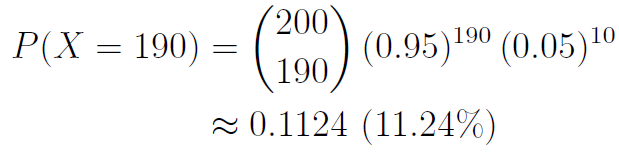

The hand calculation seems have quite discrepancy. The value P(X=190) = 0.1124 does not match with two different verifications, one through python, one through online binomial calculator.

By using online binomial calculator, https://stattrek.com/online-calculator/binomial,
Probability of success on a trial = 0.95
Number of trials = 200
Number of scucesses (x) = 190
The results for Binomial probability: P(X=190) = 0.12836.


In [28]:
# method 1
import math

prob1 = math.comb(200, 190) * (0.95)**190 * (0.05)**10
print(f"P(X = 190) = {prob1:.4f}")

P(X = 190) = 0.1284


In [32]:
# method 2
from scipy.stats import binom

n, p = 200, 0.95 # number of trials, probability of success
k = 190 # number of successes
prob = binom.pmf(k, n, p)
print(f"P(X = 190) = {prob:.4f}")

P(X = 190) = 0.1284


**(c) What’s the probability of getting 185 or more correct classifications? (10 points)**

In [33]:
prob = 1 - binom.cdf(184, n, p) # cdf is the cumulative distribution function
print(f"P(X >= 185) = {prob:.4f}")

P(X >= 185) = 0.9556


The hand calculation seems have quite discrepancy. The value P(X≥185) = 0.9891 does not match with two different verifications, one through python, one through online binomial calculator.

By using online binomial calculator, https://stattrek.com/online-calculator/binomial,
Probability of success on a trial = 0.95
Number of trials = 200
Number of scucesses (x) = 185
The results for Cumulative probability: P(X≥185) = 0.95565.

Wrong.

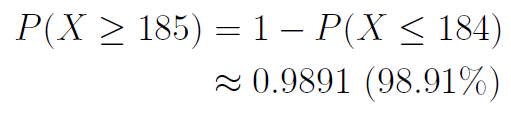

**(d) If you needed to guarantee 90% accuracy with 95% confidence, how many emails would you need to test? (5 points)**

Correct.

In [31]:
from scipy.stats import norm
import numpy as np

# Accuracy: the proportion of successes to the total number of trials
# Confidence Interval: A range with expecting the true population proportion to lie with a certain level of confidence

def find_sample_size(desired_accuracy=0.90, confidence=0.95, p=0.95):
  # calculate the percent point function (PPF)
  z = norm.ppf((1 + confidence) / 2) # corresponds to the area to the left of the z-score
  margin_error = 1 - desired_accuracy
  n = (z**2 * p * (1-p)) / margin_error**2
  return int(np.ceil(n))

n = find_sample_size()
print(f"Required sample size: {n}")

Required sample size: 19


**Q4. Poisson Distribution in Practice (30 points)
A website receives an average of 8 API requests per minute.
(a) Write the PMF for this scenario (5 points)
(b) Calculate the probability of receiving:
• Exactly 5 requests in a minute (5 points)
• More than 10 requests in a minute (5 points)
• No requests in a minute (5 points)
(c) Write a Python function that:
• Simulates request arrivals for 60 minutes
• Plots the distribution of inter-arrival times
• Compares the simulated distribution to the theoretical Poisson distribution (10
points)**

**(a) Write the PMF for this scenario (5 points)**

Correct.
The Poisson distribution models the number of events occurring within a
fixed interval.
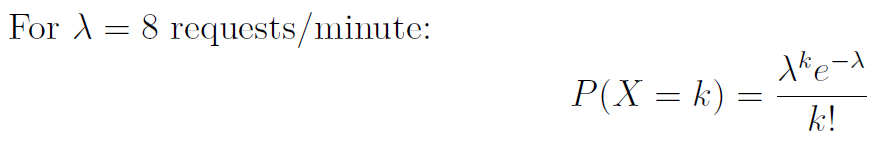

**(b) Calculate the probability of receiving:
• Exactly 5 requests in a minute (5 points)
• More than 10 requests in a minute (5 points)• No requests in a minute (5 points)**

Correct.

In [ ]:
from scipy.stats import poisson

lambda_ = 8

# Exactly 5 requests
p_5 = poisson.pmf(5, lambda_) # Calculate the probability of observing exactly 5 events given a mean of lambda_
print(f"P(X = 5) = {p_5:.4f}") # 0.0916

# More than 10 requests
p_more_10 = 1 - poisson.cdf(10, lambda_) # 1 - the probability of observing 10 or fewer events given a mean of lambda_
print(f"P(X > 10) = {p_more_10:.4f}") # 0.1912

# No requests
p_0 = poisson.pmf(0, lambda_) # Calculate the probability of observing exactly 0 events given a mean of lambda_
print(f"P(X = 0) = {p_0:.4f}") # 0.0003

P(X = 5) = 0.0916
P(X > 10) = 0.1841
P(X = 0) = 0.0003


**(c) Write a Python function that: • Simulates request arrivals for 60 minutes • Plots the distribution of inter-arrival times • Compares the simulated distribution to the theoretical Poisson distribution (10 points)**

Correct.

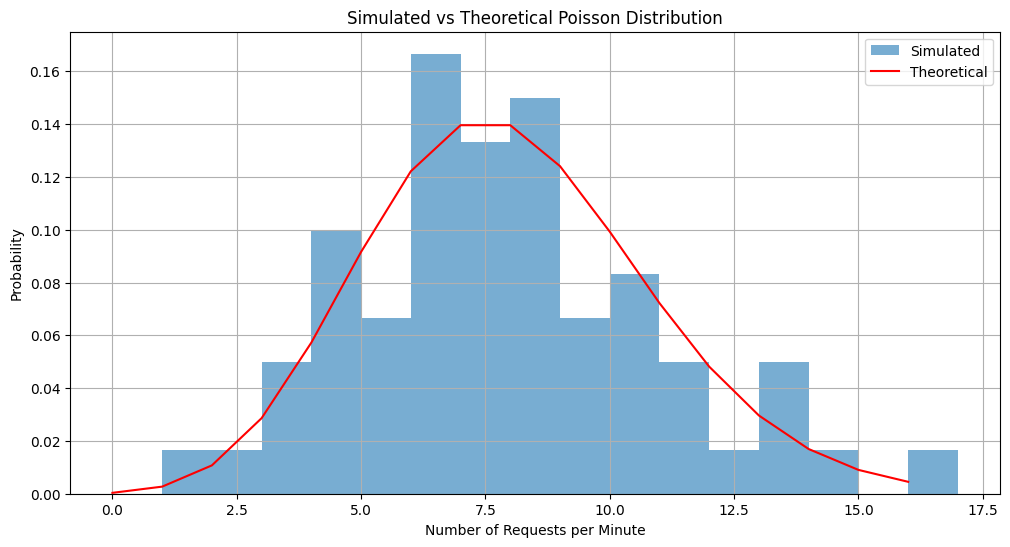

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# simulates req arrivals for the time of duration
def simulate_poisson_process(lambda_rate=8, duration=60):
  # Generate inter-arrival times (exponential distribution)
  times = np.random.exponential(1/lambda_rate, size=1000)

  # Calculate arrival times
  arrival_times = np.cumsum(times)

  # Count events per minute
  counts = np.zeros(duration)
  for t in arrival_times:
    if t >= duration:
      break
    counts[int(t)] += 1

  # Plot results
  plt.figure(figsize=(12, 6))

  # Histogram of simulated data
  plt.hist(counts, bins=range(int(max(counts))+2), density=True,
  alpha=0.6, label='Simulated')

  # Theoretical Poisson PMF
  k = range(int(max(counts))+1)
  pmf = poisson.pmf(k, lambda_rate)
  plt.plot(k, pmf, 'r-', label='Theoretical')

  plt.title('Simulated vs Theoretical Poisson Distribution')
  plt.xlabel('Number of Requests per Minute')
  plt.ylabel('Probability')
  plt.legend()
  plt.grid(True)

  plt.show()

  return counts

# Run simulation
counts = simulate_poisson_process()

**Q5. Overdispersion (10 points)
Explain how you would modify your analysis if you discovered that the API requests showed
signs of overdispersion (variance > mean). What alternative distribution might be more
appropriate, and why?**

**(10 points) Explain how you would modify your analysis if you discovered that the API requests showed signs of overdispersion (variance > mean).**

A negative binomila distribution would be more appropriate to handle "overdispersion", when variance is greater than mean. While in possion distribution, variance is always equal to the mean.

• It has an additional parameter that allows variance to exceed the mean

The additional parameter 'k' controls the "dispersion" of the distribution, meaning how spread out the data is relative to the mean; essentially allowing the variance to be greater than the mean, unlike a Poisson distribution with only one parameter.

• It can model clustering of events

In a binomial distribution, the number of trials is fixed and you count the number of successes within those trials, while in a negative binomial distribution, the number of successes is fixed and you count the number of trials needed to achieve that fixed number of successes. Thus, could view the negative binomial distribution is the "inverse" of binomial distribution.

For clustering, when data points are grouped together based on shared characteristics, forming distinct clusters, it can often lead to overdispersion.

A negative binomial distribution is used to model the number of data points that need to be examined before a certain number of points belonging to a specific cluster are found, particularly when dealing with data where the cluster sizes can vary significantly and exhibit overdispersion.

• It’s often used for “contagious” processes where one event increases the likelihood of another

A negative binomial distribution is often used to model "contagious" processes because it naturally accounts for situations where the occurrence of one event increases the likelihood of another event happening nearby, leading to clustering or aggregation in the data, unlike a simple Poisson distribution which assumes independent events; essentially, the "contagion" effect makes the variance of the data larger than the mean, a characteristic captured by the negative binomial distribution.


If the API requests show overdispersion (variance > mean):
1. The Negative Binomial distribution would be more appropriate because:

• It has an additional parameter that allows variance to exceed the mean

• It can model clustering of events

• It’s often used for “contagious” processes where one event increases the likelihood of another

**2. Implementation approach:**

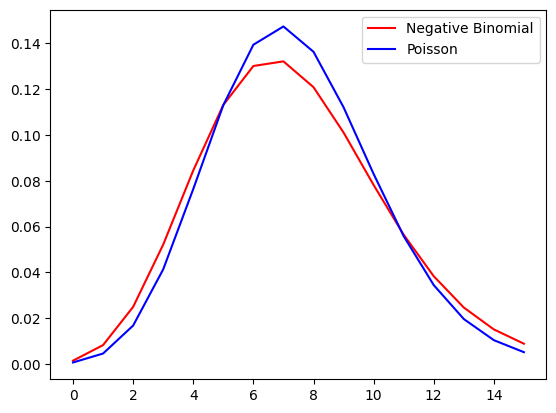

In [6]:
from scipy.stats import nbinom

def fit_negative_binomial(data):
  mean = np.mean(data)
  var = np.var(data)
  p = mean/var
  n = mean*p/(1-p)
  return n, p

# Fit to data
n, p = fit_negative_binomial(counts)

# Compare distributions
k = np.arange(max(counts))
nb_pmf = nbinom.pmf(k, n, p)
poisson_pmf = poisson.pmf(k, np.mean(counts))

plt.plot(k, nb_pmf, 'r-', label='Negative Binomial')
plt.plot(k, poisson_pmf, 'b-', label='Poisson')
plt.legend()
plt.show()

**3. Real-world causes of overdispersion in API requests:**

• Burst traffic patterns

• Time-of-day effects

• Cascading requests

• Bot activity

• System dependencies

In [12]:
# debug
1000*0.12*(1-0.12)

105.6

In [ ]:
# (a) Define the random variable and its probability mass function
P_X1 = 0.60
P_X2 = 0.30
P_X3 = 0.10

# (b)
E_X = 1*P_X1 + 2*P_X2 + 3*P_X3
print('mean: ', E_X)

# (c)
E_X2 = 1**2*P_X1 + 2**2*P_X2 + 3**2*P_X3
VAR_X = E_X2 - E_X**2
print("variance:", VAR_X)

In [25]:
import math
math.comb(200, 190) * (0.95)**190 * (0.05)**10

0.12835737340035142

In [ ]:
import math
import scipy.stats as stats

def sample_size_calculator(p, e, z):
    """
    Calculates the sample size needed for a binomial distribution.

    Args:
        p: Estimated proportion of the population
        e: Desired margin of error
        z: Z-score corresponding to the desired confidence level

    Returns:
        The required sample size
    """

    n = (z**2 * p * (1 - p)) / e**2
    return math.ceil(n)

# Example usage
p = 0.95  # Estimated proportion
e = 0.1  # Desired margin of error (e.g., 10%)
z = 1.96  # Z-score for 95% confidence level

sample_size = sample_size_calculator(p, e, z)
print("Required sample size:", sample_size)